# Multiple Regression

Chapter 15 of _Data Science from Scratch_ by Joel Grus.

In [1]:
import os.path
import random
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from math import *

In [2]:
book_dir = '/Users/CBare/Documents/projects/data-science-from-scratch'
sys.path.extend(os.path.join(book_dir, 'chapter_{:02d}'.format(i)) for i in [3,4,5,6,7,8])

In [3]:
from stats import mean, median, de_mean, standard_deviation, correlation
from gradient_descent import minimize_stochastic
from vector import dot, vector_add
from normal import normal_cdf

In [4]:
def predict(x_i, beta):
    """assumes that the first element of each x_i is 1"""
    return dot(x_i, beta)

## Predict Hours on Site

The goal is to predict time spent on a site given 3 features, number of friends, work hours per day, and whether or not the person has a PhD.

$$ minutes = \alpha  + \beta_1 friends + \beta_2 work hours + \beta_3 phd + \epsilon $$

Each person is represented as a vector of 4 elements, for example:
```
[ 1, # constant term
 49, # number of friends
  4, # work hours per day
  0] # doesn't have PhD
```

Note: The data below was snagged from Joel's source code here: https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3/multiple_regression.py#L95

In [5]:
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],
     [1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],
     [1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],
     [1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],
     [1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],
     [1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],
     [1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],
     [1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],
     [1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],
     [1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],
     [1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],
     [1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],
     [1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],
     [1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],
     [1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],
     [1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],
     [1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],
     [1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],
     [1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],
     [1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],
     [1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],
     [1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],
     [1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],
     [1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],
     [1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],
     [1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],
     [1,1,5,1]]

In [6]:
y = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,
     54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,
     35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,
     21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,
     40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,
     40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
     28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
     44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
     25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
     44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,
     36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,
     27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,
     26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
     36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
     29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,
     13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
     31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
     33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
     22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [7]:
def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

In [8]:
def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

In [9]:
def squared_error_gradient(x_i, y_i, beta):
    """the gradient (with respect to beta) corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

In [10]:
def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                               squared_error_gradient,
                               x, y,
                               beta_initial,
                               0.001)

In [11]:
random.seed(0)
beta = estimate_beta(x, y)
print(beta)
# [30.63, 0.972, -1.868, 0.911]

[30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]


### Using the model to make predictions

In [12]:
i = 100
print(x[i])
print(y[i])
print('predicted=', dot(beta, x[i]))

[1, 6, 3, 1]
39.43
predicted= 31.755912580475684


### Are friends and work hour correlated? Not really.

In [13]:
correlation([x_i[1] for x_i in x], [x_i[2] for x_i in x])

0.02529930456534995

### PhD's have no friends. Sad.

In [14]:
correlation([x_i[1] for x_i in x], [x_i[3] for x_i in x])

-0.6107431572233505

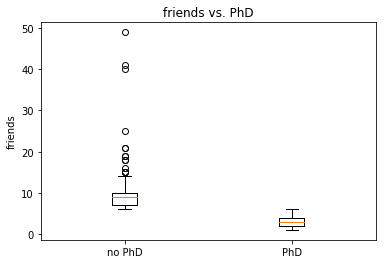

In [15]:
friends_no_phd = [x_i[1] for x_i in x if not x_i[3]]
friends_phd = [x_i[1] for x_i in x if x_i[3]]

plt.boxplot([friends_no_phd, friends_phd], labels=['no PhD', 'PhD'])
plt.title('friends vs. PhD')
plt.ylabel('friends')
plt.show()

### PhD's and non-PhD's work about the same

In [16]:
correlation([x_i[2] for x_i in x], [x_i[3] for x_i in x])

-0.031950793986044564

In [17]:
wrk_hrs_non_phds = mean([x_i[2] for x_i in x if not x_i[3]])
wrk_hrs_phds = mean([x_i[2] for x_i in x if x_i[3]])

print(f'mean work hrs non-PhDs: {wrk_hrs_non_phds:.2f}')
print(f'mean work hrs     PhDs: {wrk_hrs_phds:.2f}'.format())

mean work hrs non-PhDs: 4.70
mean work hrs     PhDs: 4.50


### People with more friends spend more time on the site

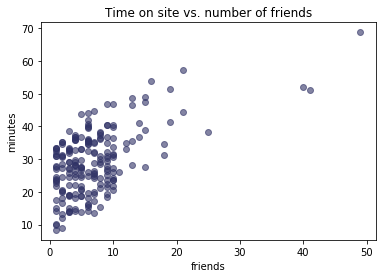

In [18]:
plt.scatter([x_i[1] for x_i in x], y, color='#30336699')
plt.title('Time on site vs. number of friends')
plt.xlabel('friends')
plt.ylabel('minutes')
plt.show()

### People who work more spend less time on the site

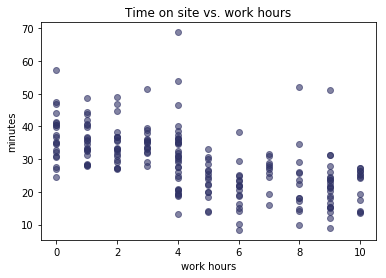

In [19]:
plt.scatter([x_i[2] for x_i in x], y, color='#30336699')
plt.title('Time on site vs. work hours')
plt.xlabel('work hours')
plt.ylabel('minutes')
plt.show()

In [20]:
y_phd = [y_i for x_i, y_i in zip(x,y) if x_i[3]]
y_not_phd = [y_i for x_i, y_i in zip(x,y) if not x_i[3]]
print(mean(y_not_phd))
print(mean(y_phd))

32.33459183673472
26.203428571428574


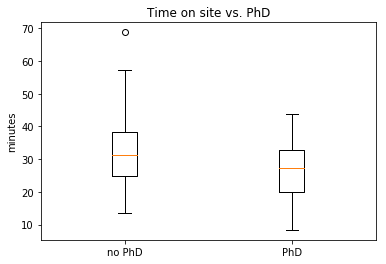

In [21]:
plt.boxplot([y_not_phd, y_phd], labels=['no PhD', 'PhD'])
plt.title('Time on site vs. PhD')
plt.ylabel('minutes')
plt.show()

This is kinda misleading and points out something interesting. The coefficient for PhD is about 0.92, implying that, all other things being equal, a user with a PhD is likely to spend an extra hour on the site compared to a similar user without a PhD. But, the mean minutes spend on the site for PhDs is lower that than of non-PhDs. Whaaa?

The explaination is that all other things aren't equal. We saw above that PhDs are sadly friendless creatures and number of friends has a strong influence on minutes-on-site.

### Goodness of Fit

In [22]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

In [23]:
def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
    for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

In [24]:
multiple_r_squared(x, y, beta)

0.6800074955952597

### Bootstrap
We take a slight digression into bootstrapping in order to compute bootstrapped estimates of standard errors for our regression coefficients.

In [25]:
def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]

In [26]:
def bootstrap_statistic(data, stats_fn, num_samples):
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [27]:
close_to_100 = [99.5 + random.random() for _ in range(101)]

In [28]:
far_from_100 = ([99.5 + random.random()] + [random.random() for _ in range(50)] +
[200 + random.random() for _ in range(50)])

In [29]:
median(close_to_100), mean(close_to_100), standard_deviation(close_to_100)

(100.06586584030461, 100.03937022319404, 0.3008288923397343)

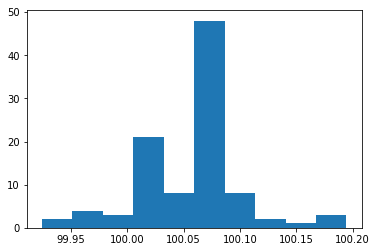

In [30]:
plt.hist(bootstrap_statistic(close_to_100, median, 100))
plt.show()

In [31]:
median(far_from_100), mean(far_from_100), standard_deviation(far_from_100)

(100.37472916630605, 100.4997364160267, 99.91542590974795)

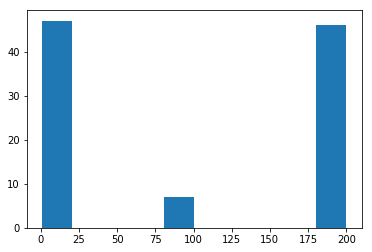

In [32]:
plt.hist(bootstrap_statistic(far_from_100, median, 100))
plt.show()

## Standard Errors of Regression Coefficients

Now, we can bootstrap estimates for our betas, getting some idea of their distributions and estimating standard error.

In [33]:
def estimate_sample_beta(sample):
    """sample is a list of pairs (x_i, y_i)"""
    x_sample, y_sample = list(zip(*sample)) # magic unzipping trick
    return estimate_beta(x_sample, y_sample)

In [34]:
random.seed(0)
bootstrap_betas = bootstrap_statistic(list(zip(x, y)),
                                      estimate_sample_beta, 100)

In [35]:
bootstrap_standard_errors = [
    standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(4)]
bootstrap_standard_errors

[0.953551702104508,
 0.06288763616183773,
 0.11722269488203318,
 0.8591786495949066]

According to the book, we should get the following:
```
# [1.174,      # constant term, actual error = 1.19
#  0.079,      # num_friends, actual error = 0.080
#  0.131,      # unemployed, actual error = 0.127
#  0.990]      # phd, actual error = 0.998
```

In [36]:
def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        # if the coefficient is positive, we need to compute twice the
        # probability of seeing an even *larger* value
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        # otherwise twice the probability of seeing a *smaller* value
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

In [37]:
print('{:>10} {:>10} {:>10}'.format('beta', 'b.s.e.', 'p val'))
for i in range(4):
    print('{:10.02f} {:10.02f} {:10.02f}'.format(beta[i],
                              bootstrap_standard_errors[i],
                              p_value(beta[i], bootstrap_standard_errors[i])))

      beta     b.s.e.      p val
     30.62       0.95       0.00
      0.97       0.06       0.00
     -1.87       0.12       0.00
      0.92       0.86       0.29


Expected p-values from the book.
```
# ~0   (constant term)
# ~0   (num_friends)
# ~0   (work_hours)
# 0.36 (phd)
```

#### Bootstrap distributions of betas

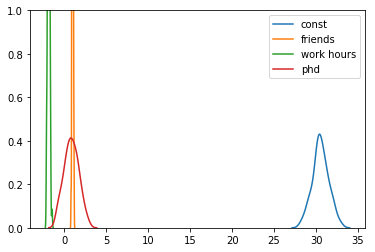

In [38]:
for i in range(4):
    sns.distplot([beta[i] for beta in bootstrap_betas], hist=False,
                 label=['const', 'friends', 'work hours', 'phd'][i])
plt.ylim(0,1)
plt.legend()
plt.show()

## Regularization

In [39]:
def ridge_penalty(beta, alpha):
    return alpha * dot(beta[1:], beta[1:])

In [40]:
def squared_error_ridge(x_i, y_i, beta, alpha):
    """estimate error plus ridge penalty on beta"""
    return error(x_i, y_i, beta) ** 2 + ridge_penalty(beta, alpha)

In [41]:
def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0] + [2 * alpha * beta_j for beta_j in beta[1:]]

In [42]:
def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term including the ridge penalty"""
    return vector_add(squared_error_gradient(x_i, y_i, beta),
                          ridge_penalty_gradient(beta, alpha))

In [43]:
def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression with penalty alpha"""
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(partial(squared_error_ridge, alpha=alpha),
                               partial(squared_error_ridge_gradient, alpha=alpha),
                               x, y,
                               beta_initial,
                               0.001)

In [44]:
random.seed(0)
beta_0 = estimate_beta_ridge(x, y, alpha=0.0)
beta_0
# [30.6, 0.97, -1.87, 0.91]

[30.619881701311712,
 0.9702056472470465,
 -1.8671913880379478,
 0.9163711597955347]

In [45]:
dot(beta_0[1:], beta_0[1:]) # 5.26

5.267438780018153

In [46]:
multiple_r_squared(x, y, beta_0) # 0.680

0.6800074955952597

#### With increasing regularization, coefficients get smaller

In [47]:
beta_reg = estimate_beta_ridge(x, y, alpha=0.01)
print(beta_reg)
# [30.6, 0.97, -1.86, 0.89]
print(dot(beta_reg[1:], beta_reg[1:])) # 5.19
print(multiple_r_squared(x, y, beta_reg)) # 0.680

[30.55985204967343, 0.9730655363505671, -1.8624424625144256, 0.9317665551046306]
5.2837373774215655
0.680010213297079


In [48]:
beta_reg = estimate_beta_ridge(x, y, alpha=0.1)
print(beta_reg)
print(dot(beta_reg[1:], beta_reg[1:]))
print(multiple_r_squared(x, y, beta_reg))
# [30.8, 0.95, -1.84, 0.54]
# 4.60
# 0.680

[30.894860179735474, 0.9490275238632391, -1.8501720889216575, 0.5325129720515789]
4.607360065077926
0.6797276241305292


In [49]:
beta_reg = estimate_beta_ridge(x, y, alpha=1)
print(beta_reg)
print(dot(beta_reg[1:], beta_reg[1:]))
print(multiple_r_squared(x, y, beta_reg))
# [30.7, 0.90, -1.69, 0.085]
# 3.69
# 0.676

[30.666778908554885, 0.908635996761392, -1.6938673046100265, 0.09370161190283018]
3.7035858123105934
0.6757061537631815


In [50]:
beta_reg = estimate_beta_ridge(x, y, alpha=10)
print(beta_reg)
print(dot(beta_reg[1:], beta_reg[1:]))
print(multiple_r_squared(x, y, beta_reg))
# [28.3, 0.72, -0.91, -0.017]
# 1.36
# 0.573

[28.372861060795607, 0.7307660860322116, -0.9212163182015426, -0.018495551723207087]
1.3830006628491893
0.5752138470466858


#### Lasso penalty

Lasso can force coefficients to zero, but is not amenable to gradient descent. :(

In [51]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])